#  Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị. 
Tập dữ liệu lấy từ: https://www.kaggle.com/code/rajatkumar30/eda-online-retail<br>
**Mục tiêu biến dữ liệu giao dịch thô thành những hiểu biết kinh doanh có giá trị, giúp doanh nghiệp trả lời các câu hỏi quan trọng về khách hàng, sản phẩm, và xu hướng thị trường để đưa ra các quyết định tốt hơn**

## Bài làm

### Bước 1: Tải và Khám phá dữ liệu ban đầu

In [18]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu từ file 
df = pd.read_csv(r"..\data\OnlineRetail.csv", encoding='utf-8')



# --- Khám phá ban đầu ---
# Xem 5 dòng đầu tiên
print("Dữ liệu ban đầu:")
print(df.head())

# Xem thông tin tổng quan
print("\nThông tin tổng quan:")
df.info()

# Xem thống kê mô tả cho các cột số
print("\nThống kê mô tả:")
print(df.describe())


Dữ liệu ban đầu:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ---

Phân tích ban đầu:<br>
    - Cho thấy có rất nhiều giá trị thiếu (`null`) trong cột `Description` và đặc biệt là `CustomerID`.<br>
    - `.describe()` cho thấy `Quantity` có giá trị tối thiểu là số âm (ví dụ: -80995), và `UnitPrice` có giá trị tối thiểu là 0. Đây là những điểm bất thường cần được xử lý.


### Bước 2: Làm sạch và Tiền xử lý dữ liệu
Đây là bước cốt lõi để đảm bảo dữ liệu của chúng ta đáng tin cậy.

**2.1. Xử lý giá trị bị thiếu**

Chúng ta sẽ tập trung vào cột `CustomerID` vì các phân tích về khách hàng sẽ không thể thực hiện nếu thiếu thông tin này.

In [2]:
# Kiểm tra số lượng giá trị thiếu
print(f"Số dòng có CustomerID bị thiếu: {df['CustomerID'].isnull().sum()}")

# Loại bỏ các dòng không có CustomerID
df_cleaned = df.dropna(subset=['CustomerID'])

# Kiểm tra lại
print(f"Số dòng còn lại sau khi loại bỏ: {df_cleaned.shape[0]}")

Số dòng có CustomerID bị thiếu: 135080
Số dòng còn lại sau khi loại bỏ: 406829


**2.2 Xử lí các giao dịch bị hủy và đơn giá bất thường**

Các giao dịch có Quantity âm và InvoiceNo bắt đầu bằng 'C'. Đơn giá bằng 0 cũng là 1 vấn đề

In [3]:
# Loại bỏ các giao dịch bị hủy (số lượng < 0)
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Loại bỏ các mặt hàng có đơn giá bằng 0
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

# Kiểm tra lại kích thước dữ liệu
print(f"Số dòng còn lại sau khi làm sạch: {df_cleaned.shape[0]}")

Số dòng còn lại sau khi làm sạch: 397884


**2.3. Chuyển đổi kiểu dữ liệu**
    
Chuyển đổi CustomerID và InvoiceDate về đúng định dạng.

In [4]:
# Kiểm tra dữ liệu trước khi chuyển
df_cleaned['InvoiceDate'].dtypes

dtype('O')

In [5]:
# Chuyển cột InvoiceDate sang kiểu datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')

# Tạo cột TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Tách thông tin thời gian từ InvoiceDate
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Xem kết quả
print(df_cleaned[['InvoiceDate', 'TotalPrice', 'Year', 'Month', 'Hour']].head())


          InvoiceDate  TotalPrice  Year  Month  Hour
0 2010-12-01 08:26:00       15.30  2010     12     8
1 2010-12-01 08:26:00       20.34  2010     12     8
2 2010-12-01 08:26:00       22.00  2010     12     8
3 2010-12-01 08:26:00       20.34  2010     12     8
4 2010-12-01 08:26:00       20.34  2010     12     8


### Bước 4: Trực quan hóa và Phân tích
Bây giờ dữ liệu đã sạch, chúng ta sẽ bắt đầu đặt câu hỏi và tìm câu trả lời bằng biểu đồ.

**4.1. Phân tích tổng quan về Doanh thu và Khách hàng**

Câu hỏi: Những quốc gia nào đóng góp nhiều doanh thu nhất?

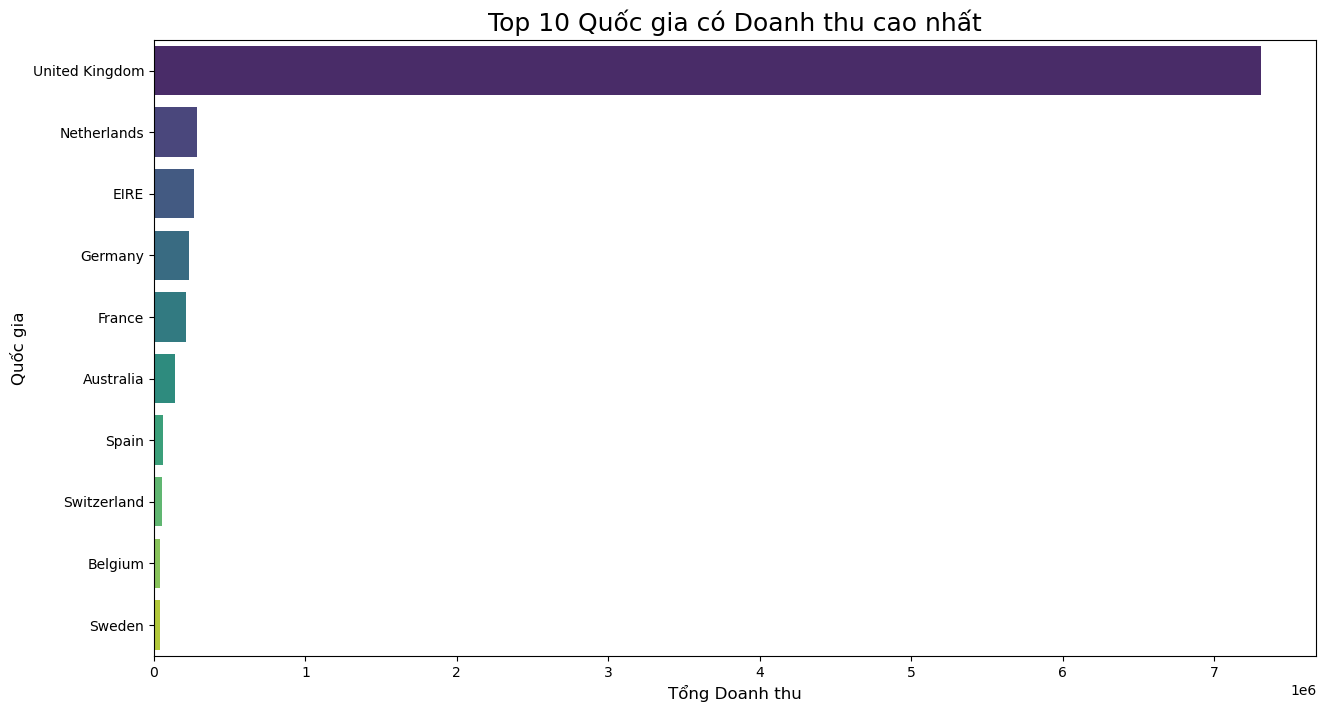

In [19]:
# Tính tổng doanh thu theo quốc gia
country_revenue = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Vẽ biểu đồ Top 10 quốc gia có doanh thu cao nhất
plt.figure(figsize=(15, 8))
sns.barplot(
    x=country_revenue.head(10).values,
    y=country_revenue.head(10).index,
    hue=country_revenue.head(10).index,
    palette='viridis',
    legend=False
)

plt.title('Top 10 Quốc gia có Doanh thu cao nhất', fontsize=18)
plt.xlabel('Tổng Doanh thu', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.show()


```*   **Nhận xét:** Không có gì ngạc nhiên khi **United Kingdom** chiếm phần lớn doanh thu, vì đây là công ty có trụ sở tại đó. Các thị trường quan trọng tiếp theo là Hà Lan (Netherlands), EIRE (Ireland), Đức (Germany), và Pháp (France).

**Nhận xét:** <br>
    - United  Kingdom chiếm danh thu cao nhất, tiếp đến là Netherlands,EIRE,Germany<br>
    - Thấp nhất là Sweden

**4.2. Phân tích theo Thời gian**

Câu hỏi: Xu hướng doanh thu theo tháng và theo giờ trong ngày như thế nào?

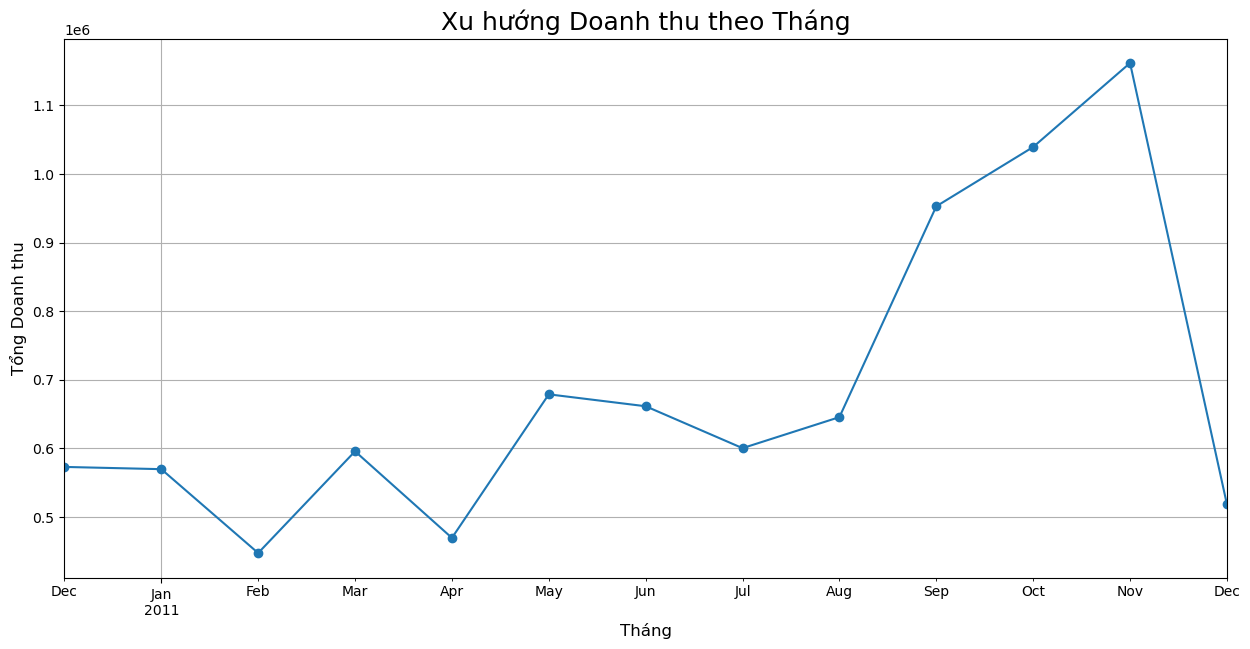

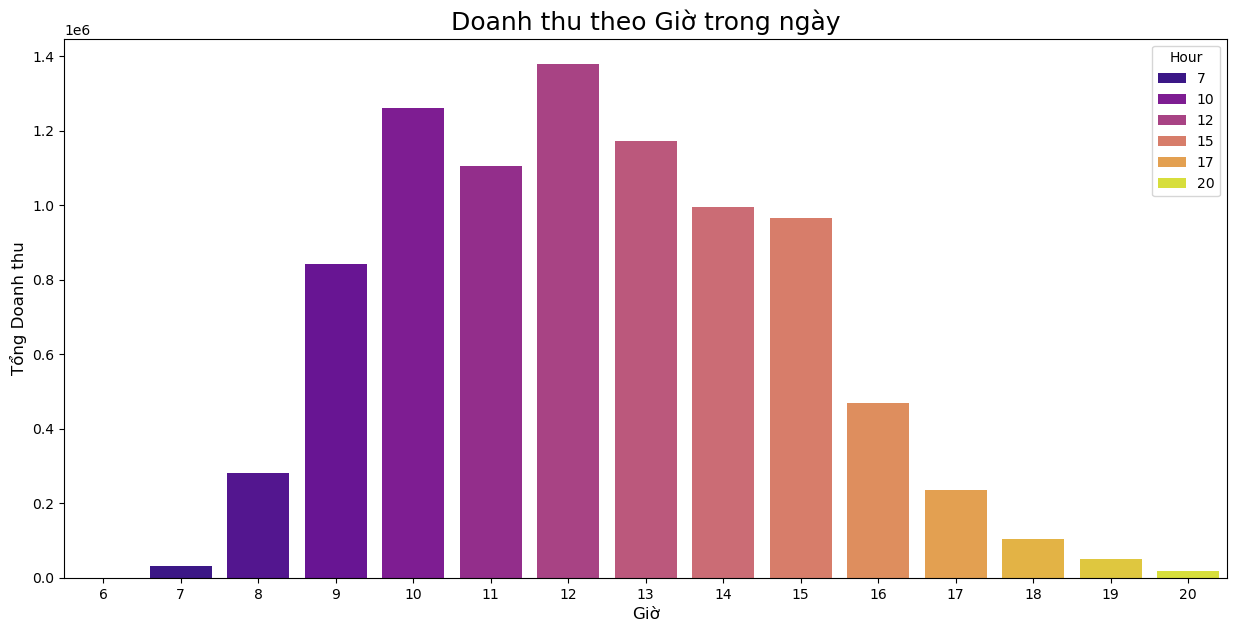

In [7]:
# Tạo một cột mới 'Month_Year' để nhóm theo tháng và năm
df_cleaned['Month_Year'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Doanh thu theo tháng
monthly_revenue = df_cleaned.groupby('Month_Year')['TotalPrice'].sum()

plt.figure(figsize=(15, 7))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Xu hướng Doanh thu theo Tháng', fontsize=18)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Tổng Doanh thu', fontsize=12)
plt.grid(True)
plt.show()

# Doanh thu theo giờ trong ngày
hourly_revenue = df_cleaned.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(15, 7))
sns.barplot(x=hourly_revenue.index, y=hourly_revenue.values,hue=hourly_revenue.index, palette='plasma')
plt.title('Doanh thu theo Giờ trong ngày', fontsize=18)
plt.xlabel('Giờ', fontsize=12)
plt.ylabel('Tổng Doanh thu', fontsize=12)
plt.show()


*Nhận xét*<br>
    - Theo tháng: tăng mạnh vào cuối năm đặc biệt từ tháng 9 đến tháng 11 do dịp lễ.<br>
    - Theo giờ : khung giờ cao nhất từ 10 giờ sáng đến 3h chiều, doanh thu rất thấp vào sáng sớm và chiều muộn.

**4.3. Phân tích Sản phẩm**

Câu hỏi: Những sản phẩm nào được bán chạy nhất?

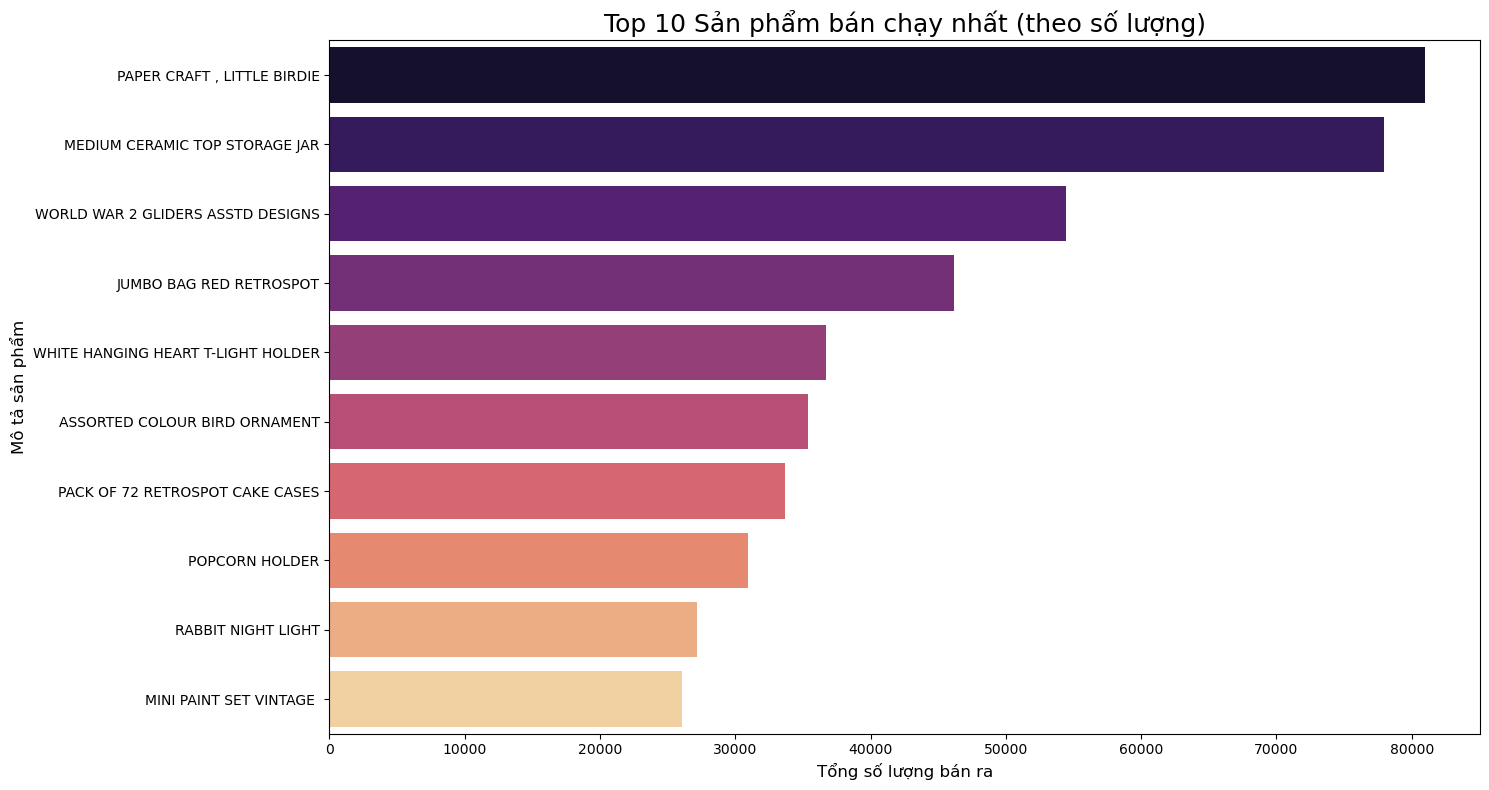

In [11]:
# Top 10 sản phẩm bán chạy nhất (theo số lượng)
top_selling_products = (
    df_cleaned.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(15, 8))
sns.barplot(
    y=top_selling_products.index,
    x=top_selling_products.values,
    hue=top_selling_products.index,
    palette='magma',
    legend=False
)
plt.title('Top 10 Sản phẩm bán chạy nhất (theo số lượng)', fontsize=18)
plt.xlabel('Tổng số lượng bán ra', fontsize=12)
plt.ylabel('Mô tả sản phẩm', fontsize=12)
plt.tight_layout()
plt.show()


**Phân tích**<br>
    Các sản phẩm bán chạy nhất chủ yếu là hàng trang trí, đồ gia dụng nhỏ, và đồ thủ công.<br>
    Đây có khả năng là các mặt hàng có đơn giá thấp, khuyến khích khách hàng mua với số lượng lớn để làm quà tặng hoặc bán sỉ.<br>
    Nhu cầu về các sản phẩm lưu trữ, đóng gói (như STORAGE JAR, JUMBO BAG) là rất cao.

**4.4. Phân tích Khách hàng (Sơ bộ)**


Câu hỏi: Những khách hàng nào chi tiêu nhiều nhất?

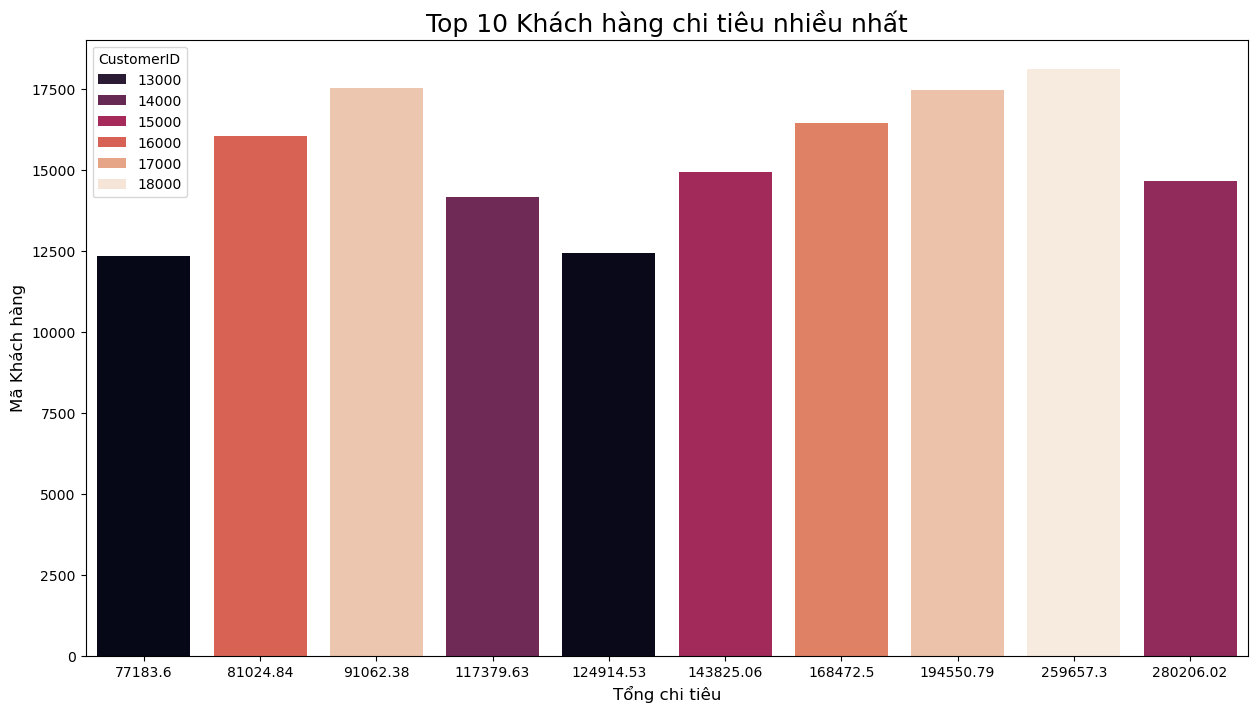

In [14]:
# Top 10 khách hàng chi tiêu nhiều nhất
top_customers = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_customers.head(10).values, y=top_customers.head(10).index,hue=top_customers.head(10).index, palette='rocket')
plt.title('Top 10 Khách hàng chi tiêu nhiều nhất', fontsize=18)
plt.xlabel('Tổng chi tiêu', fontsize=12)
plt.ylabel('Mã Khách hàng', fontsize=12)
plt.show()

**Nhận xét:**

Có một nhóm nhỏ khách hàng đóng góp một phần rất lớn vào tổng doanh thu. Khách hàng có ID 14646.0, 18102.0, 17450.0 là những khách hàng giá trị nhất.

### Bước 5: Kết luận & Tổng kết các Insight chính
Qua quá trình Phân tích Dữ liệu Khám phá (EDA) trên tập dữ liệu bán lẻ trực tuyến, chúng tôi đã rút ra được những kết luận và insight quan trọng sau về hoạt động kinh doanh của doanh nghiệp:



**1.Chất lượng dữ liệu** là yếu tố then chốt: Dữ liệu gốc chứa một lượng lớn các giao dịch bị hủy (số lượng âm) và các dòng thiếu thông tin khách hàng (CustomerID). Việc làm sạch và tiền xử lý dữ liệu ở Bước 2 là bước bắt buộc để đảm bảo các phân tích sau này có độ chính xác và tin cậy.

**2. Đặc điểm thị trường và khách hàng:**

    - Thị trường cốt lõi: Vương quốc Anh (United Kingdom) là thị trường lớn nhất, chiếm phần lớn áp đảo trong tổng doanh thu. Các thị trường tiềm năng tiếp theo ở châu Âu bao gồm Hà Lan, Ireland, Đức và Pháp.
    - Phân bổ khách hàng: Số lượng giao dịch giữa khách hàng Nam/Nữ và giữa khách hàng Thành viên/Vãng lai là khá cân bằng.

**3. Xu hướng kinh doanh theo thời gian:**

    - Xu hướng tháng: Doanh thu có xu hướng tăng trưởng mạnh vào cuối năm, đạt đỉnh vào tháng 11. Đây có thể là mùa mua sắm cao điểm cho các dịp lễ, đòi hỏi sự chuẩn bị kỹ lưỡng về hàng hóa và marketing.
    - Xu hướng giờ: Khung giờ mua sắm sôi động nhất trong ngày là từ 10 giờ sáng đến 3 giờ chiều. Đây là thông tin quan trọng để tối ưu hóa việc vận hành website và phân bổ nhân sự hỗ trợ.

**4. Phân tích Sản phẩm và Khách hàng:**

    - Sản phẩm phổ biến: Các sản phẩm bán chạy nhất về mặt số lượng chủ yếu là các mặt hàng trang trí, quà tặng có giá trị thấp. Điều này cho thấy chiến lược sản phẩm "mồi" hoặc bán sỉ có thể đang hoạt động hiệu quả.
    - Khách hàng giá trị: Có một nhóm nhỏ khách hàng (CustomerID như 14646.0, 18102.0) đóng góp một phần rất lớn vào tổng doanh thu. Đây là những khách hàng VIP cực kỳ quan trọng cần được chăm sóc đặc biệt.

## Kết thúc